In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\archive (2)\\batting_stats_for_icc_mens_t20_world_cup_2024.csv")
df.head()

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.5,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94*,40.5,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.0,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.0,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.0,69.23,0,0,0


In [5]:
df.shape

(247, 12)

In [10]:
df.Player.value_counts()

Player
NP Kenjige         1
JDS Neesham        1
AT Nidamanuru      1
P Nissanka         1
Noor Ahmad         1
                  ..
Jaker Ali          1
M Jansen           1
Jasdeep Singh      1
A Johnson          1
Zeeshan Maqsood    1
Name: count, Length: 247, dtype: int64

In [11]:
df.Team.value_counts()

Team
Oman                        15
Uganda                      15
United States of America    14
Namibia                     14
New Zealand                 14
West Indies                 13
Afghanistan                 13
Nepal                       13
Bangladesh                  13
Papua New Guinea            13
Pakistan                    13
England                     12
Sri Lanka                   12
Australia                   12
Netherlands                 12
Ireland                     11
India                       11
Canada                      10
South Africa                10
Scotland                     7
Name: count, dtype: int64

<Axes: xlabel='SR', ylabel='Count'>

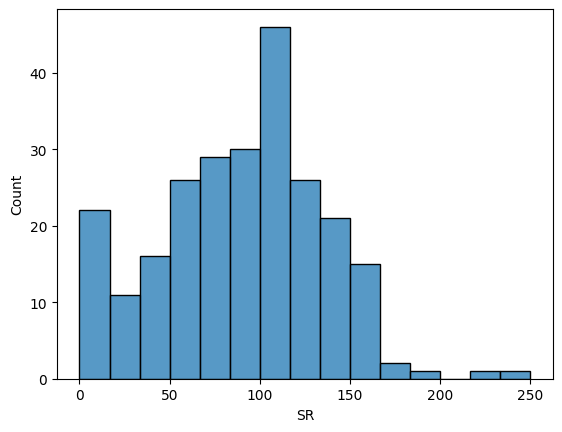

In [14]:
sns.histplot(x=df.SR,bins=15)

Top 5 players with highest strike rate in 2024

In [24]:
d1=df.groupby('Player')["SR"].mean().sort_values(ascending=False)
d1.head(5)

Player
Naseem Shah     250.00
PW Hasaranga    222.22
SD Hope         187.71
Ali Khan        175.00
B McMullen      170.73
Name: SR, dtype: float64

Players strike rate according to your team's choice

In [34]:
country=input("Enter your team to know the players strike rate:")

d2=df[df["Team"]==country]
d2.groupby('Player')["SR"].mean().sort_values(ascending=False)

Player
RA Jadeja         159.09
RG Sharma         156.70
HH Pandya         151.57
AR Patel          139.39
SA Yadav          135.37
RR Pant           127.61
S Dube            114.65
V Kohli           112.68
Mohammed Siraj    100.00
Arshdeep Singh     75.00
JJ Bumrah           0.00
Name: SR, dtype: float64

<Axes: xlabel='Runs', ylabel='SR'>

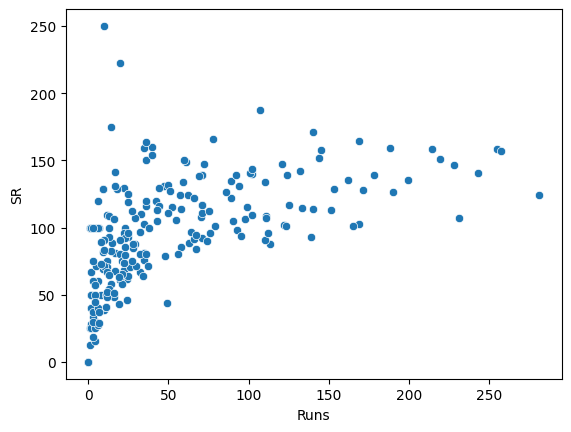

In [30]:
sns.scatterplot(x="Runs",y="SR",data=df)

Strike Rate and Runs are not that much correlated.

<Axes: xlabel='HS', ylabel='Count'>

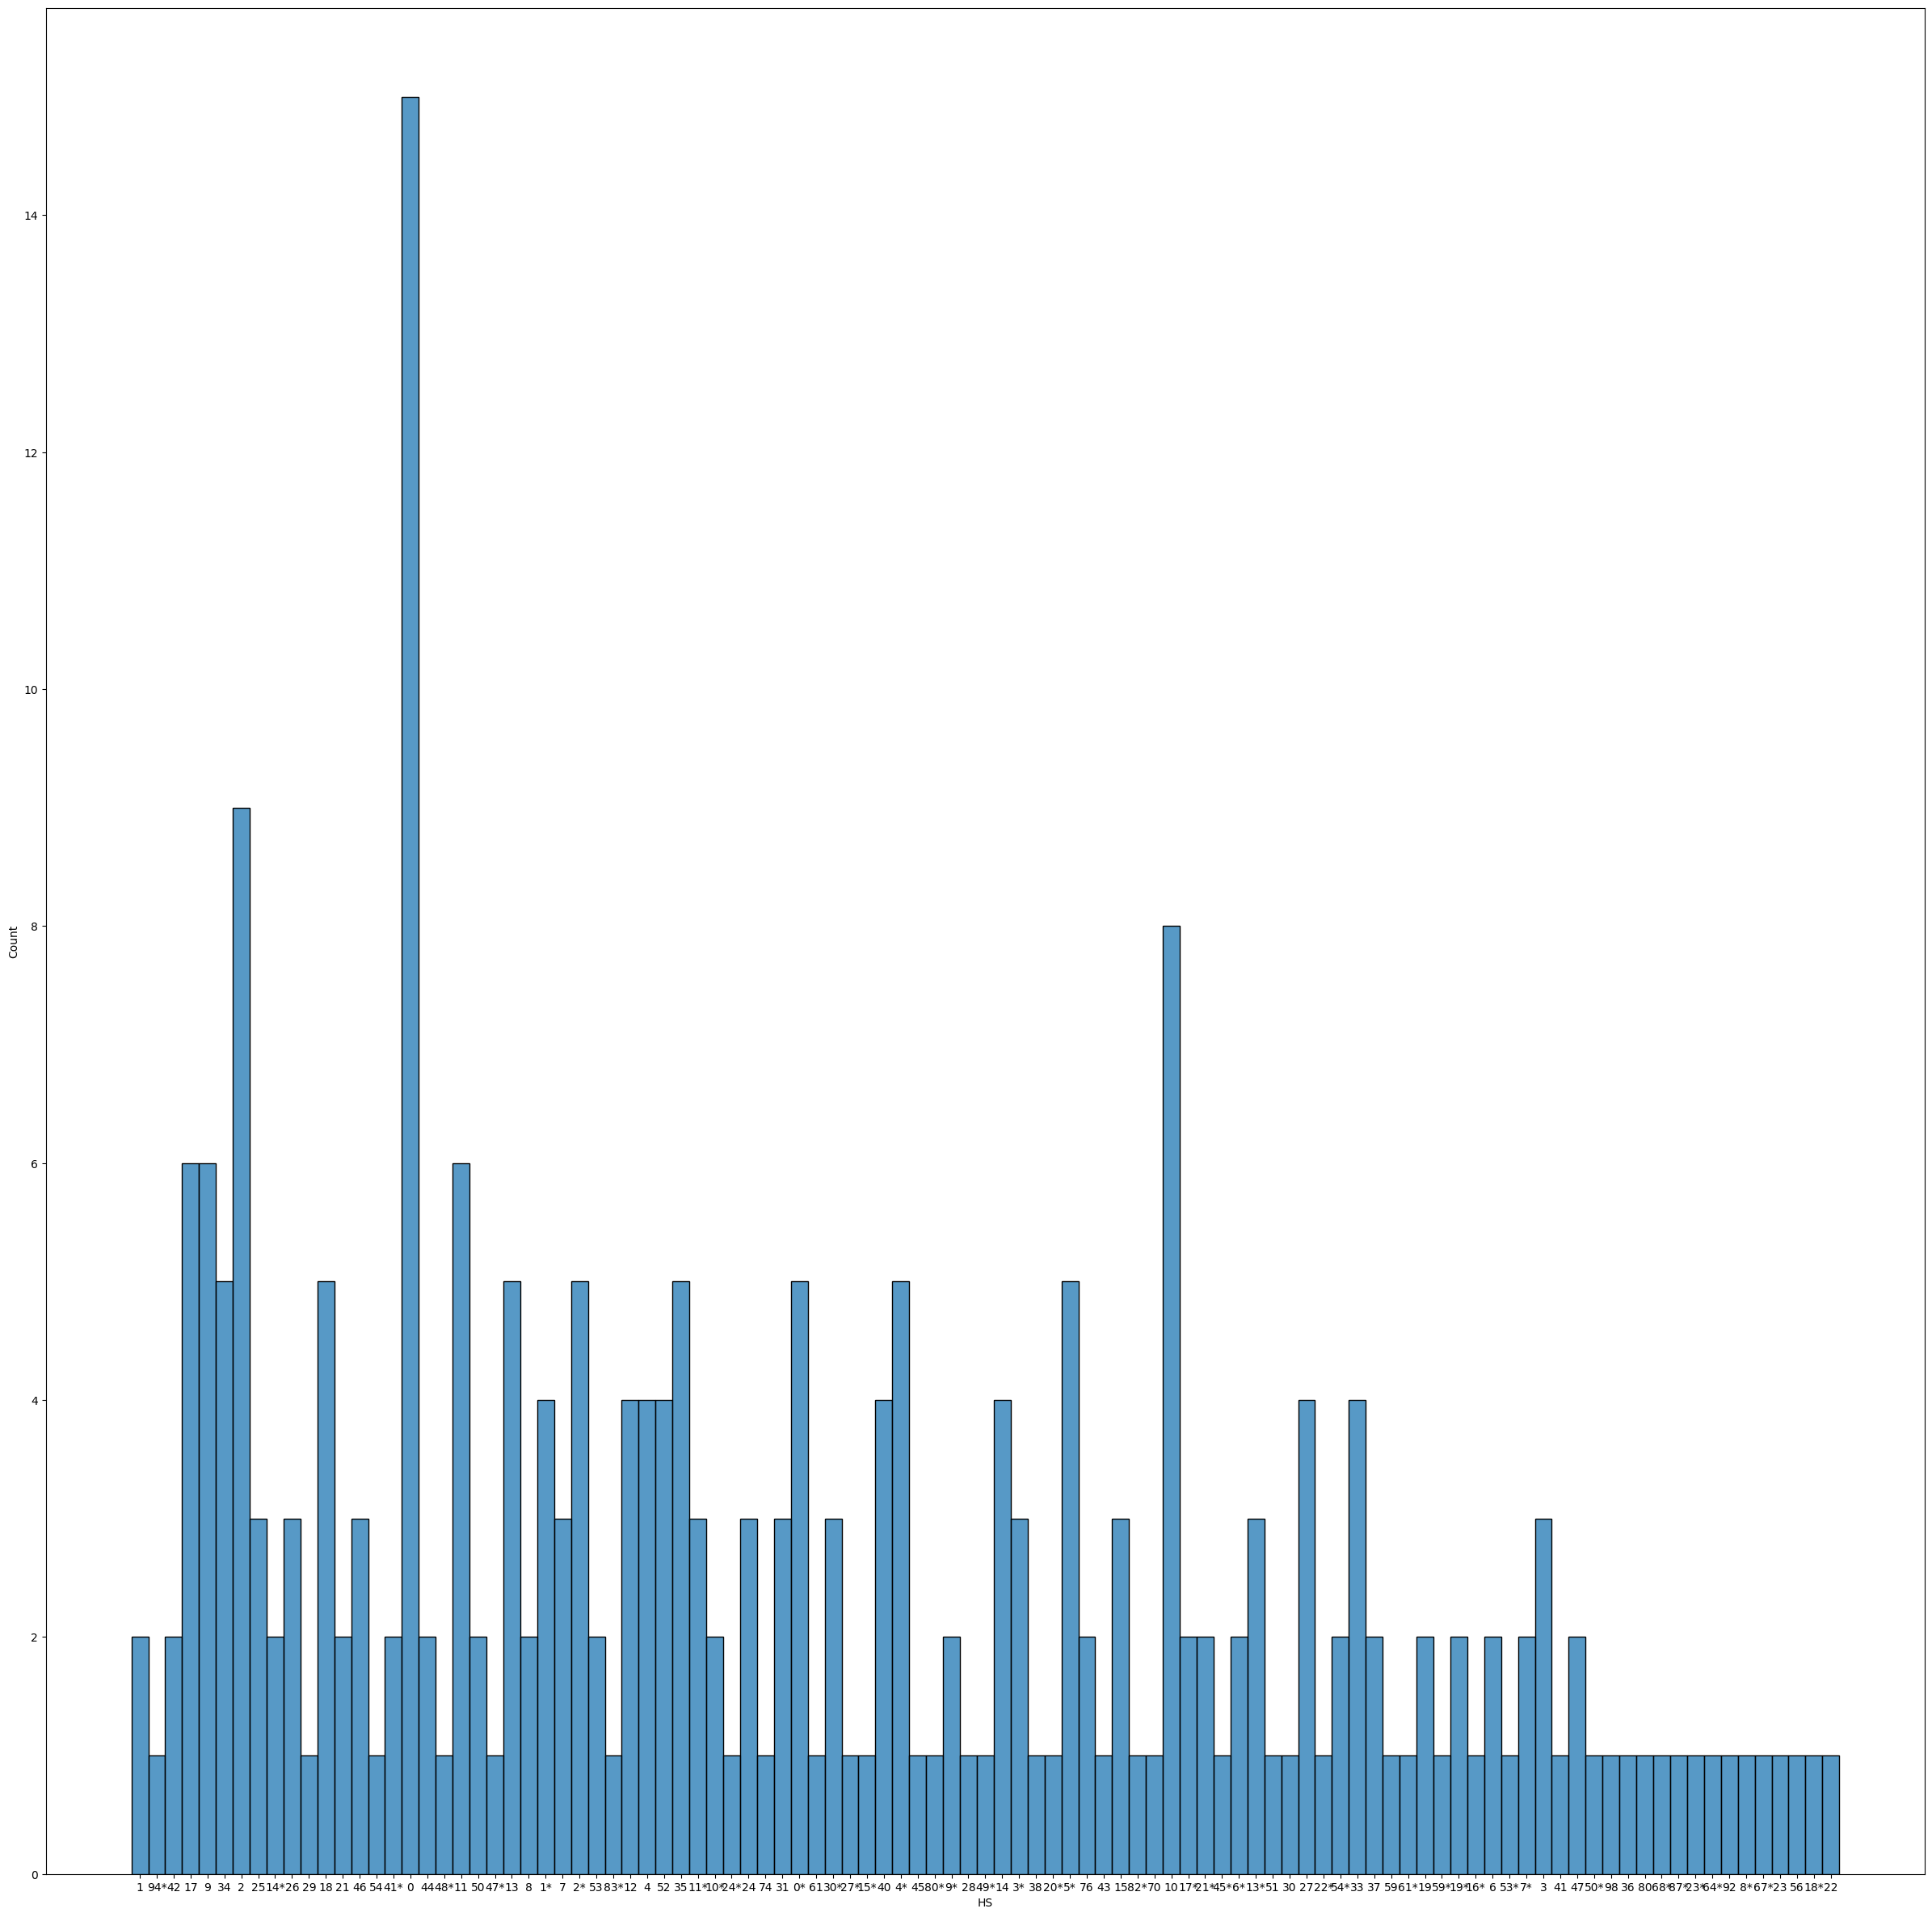

In [37]:
plt.figure(figsize=([30,30]))
sns.histplot(x=df.HS)

In [49]:
df["HS"] = df["HS"].str.replace("*", "", regex=False)

In [53]:
df["HS"]=df["HS"].astype(int)

In [56]:
df.groupby(["Player","Team"])["HS"].max().sort_values(ascending=False).head(10)

Player              Team                    
N Pooran            West Indies                 98
Aaron Jones         United States of America    94
RG Sharma           India                       92
PD Salt             England                     87
JC Buttler          England                     83
SD Hope             West Indies                 82
Rahmanullah Gurbaz  Afghanistan                 80
AGS Gous            United States of America    80
V Kohli             India                       76
TM Head             Australia                   76
Name: HS, dtype: int32

In [61]:
df.groupby("Team").agg(
    matches_count=("Mat", "count"),
    total_runs=("Runs", "sum")
).sort_values(by="matches_count", ascending=False)

,matches_count,total_runs
Team,,
Uganda,15,178
Oman,15,407
New Zealand,14,307
United States of America,14,829
Namibia,14,388
Nepal,13,276
Papua New Guinea,13,329
Pakistan,13,460
Afghanistan,13,922


In [62]:
df.groupby("Team").agg(
    matches_count=("Mat", "count"),
    total_runs=("Runs", "sum")
).sort_values(by="total_runs", ascending=False)

,matches_count,total_runs
Team,,
India,11,1201
South Africa,10,1058
West Indies,13,1056
Australia,12,981
Afghanistan,13,922
England,12,856
United States of America,14,829
Bangladesh,13,819
Scotland,7,544


In [65]:
df["100"].value_counts()

100
0    247
Name: count, dtype: int64

In [66]:
df["50"].value_counts()

50
0    213
1     24
2      8
3      2
Name: count, dtype: int64

In [76]:
p=int(input("Enter the number of 50 s to view players:"))

d3=df[df["50"]==p]
result = d3[["Player", "Team"]]

# Display the result
print(result)


             Player                      Team
47        Q de Kock              South Africa
65         AGS Gous  United States of America
75          TM Head                 Australia
82   Ibrahim Zadran               Afghanistan
129      B McMullen                  Scotland
216      MP Stoinis                 Australia
240       DA Warner                 Australia
244        SA Yadav                     India


In [67]:
df.groupby("Player")["50"].max().sort_values(ascending=False)

Player
RG Sharma             3
Rahmanullah Gurbaz    3
AGS Gous              2
SA Yadav              2
DA Warner             2
                     ..
JN Frylinck           0
JP Kotze              0
JR Hazlewood          0
JT Brassell           0
Zeeshan Maqsood       0
Name: 50, Length: 247, dtype: int64

In [78]:
df["0"].value_counts()

0
0    152
1     80
2     13
3      2
Name: count, dtype: int64

<Axes: xlabel='Runs', ylabel='Count'>

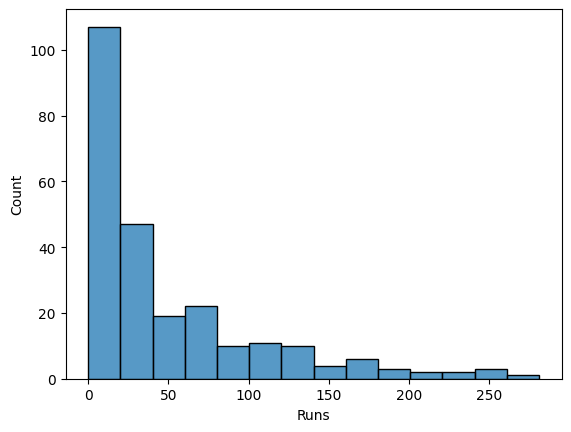

In [80]:
sns.histplot(x=df.Runs)

In [81]:
df["Runs"].describe()

count    247.000000
mean      49.149798
std       58.137259
min        0.000000
25%        8.000000
50%       25.000000
75%       71.000000
max      281.000000
Name: Runs, dtype: float64

In [86]:
df.groupby(["Player","Team","Mat"])["Runs"].max().sort_values(ascending=False).head(10)

Player              Team                      Mat
Rahmanullah Gurbaz  Afghanistan               8      281
RG Sharma           India                     8      257
TM Head             Australia                 7      255
Q de Kock           South Africa              9      243
Ibrahim Zadran      Afghanistan               8      231
N Pooran            West Indies               7      228
AGS Gous            United States of America  6      219
JC Buttler          England                   8      214
SA Yadav            India                     8      199
H Klaasen           South Africa              9      190
Name: Runs, dtype: int64

<Axes: xlabel='Ave', ylabel='SR'>

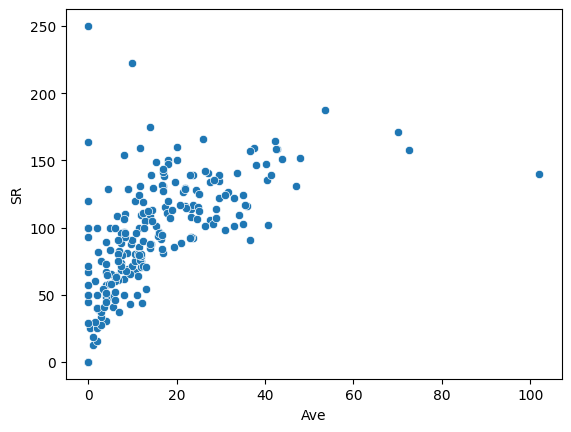

In [89]:
sns.scatterplot(x="Ave",y="SR",data=df)